The idea is to do some basic EDA on soccer team dates of birth, to try to replicate the findings of Malcom Gladwell

In [1]:
import pandas as pd

Google conveniently provides the dates of players from a given team, including players from many age divisions.

Generally searching for '[Team name] players date of birth' will be enough, for any given team.

To extract the data from the featured snippet that usually appears, we right click + inspect it and copy>copy outerHTML.

We can then paste that on the variable below.

This can be further automatized in the future, but was done manually for now just as a proof of concept.

In [2]:
sometext = """
<div jsname="s2gQvd" class="EDblX DAVP1" role="tablist" style="padding-right:20px;padding-left:180px" jsslot=""><div jsname="NlQ1ke" class="KKHQ8c" style="width:2896px;height:266px"><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="January 4, 1986 (age 35&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/07k91_" data-entityname="January 4, 1986 (age 35&nbsp;years)" href="/search?q=James+Milner&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiBLHMsy0N47Xks5Ot9AtS8wtyUoFUUXF-nlVKYkmqQn6aQlJmUUnGI8bVTNwCL3_cE5ZayDRpzclrjLOYuAhpEkrjYnPNK8ksqRSKEYrikgUpLy7ILyophlLxJamJuVZF-cUlqUVCOnDFPFJcXHBXGolw8eqn6xsaZhUUGSSnpZgLXPw-g1GJ-QAjkxWTBlMVEweDUhujUfyuS9POsUUKMgBBwrwQBylNLSEuds9in_zkxBxBUb4j9SvOvbfXEubiCEmsyM_Lz60UbGj4Y5_8-b29kiLnhS8MDXevvrcXvNnAwPCXNdBBgkeBQYPB8PI19gds8VIHtBiCuEGOMDLMS89NtgwCh5xhdnJeDtAZTftWHGJj4WAUYAA6iBHkIJ5FrDxeibmpxQq-mTl5qUUT2BgBnP6ORnkBAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wFXoECAEQNA" role="tab" title="January 4, 1986 (age 35&nbsp;years) (age 35&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQNA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wFXoECAEQNA" tabindex="0"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">January 4, 1986 (age 35&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 35&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="January 3, 1987 (age 34&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0cm81mk" data-entityname="January 3, 1987 (age 34&nbsp;years)" href="/search?q=Adri%C3%A1n+(footballer)&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArGScy0Mc7O15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWEceUoszDC_MUNNLy80uSEnNyUos0J7AxAgDWOmG2ggEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wFnoECAEQNg" role="tab" title="January 3, 1987 (age 34&nbsp;years) (age 34&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQNg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wFnoECAEQNg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">January 3, 1987 (age 34&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 34&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="June 17, 1990 (age 31&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/04y7vnh" data-entityname="June 17, 1990 (age 31&nbsp;years)" href="/search?q=Jordan+Henderson&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArMqzcvyMrTks5Ot9AtS8wtyUoFUUXF-nlVKYkmqQn6aQlJmUUnGI8bVTNwCL3_cE5ZayDRpzclrjLOYuAhpEkrjYnPNK8ksqRSKEYrikgUpLy7ILyophlLxJamJuVZF-cUlqUVCOnDFPFJcXHBnGolw8eqn6xsaZhUUGSSnpZgLXPw-g1GJ-QAjkxWTBlMVEweDUhujUfyuS9POsUUKMgBBwrwQBylNLSEuds9in_zkxBxBUb4j9SvOvbfXEubiCEmsyM_Lz60UbGj4Y5_8-b29kiLnhS8MDXevvrcXvNnAwPCXNdBBgkeBQYPB8PI19gds8VIHtBiCuEGOMDLMS89NtgziBLnOMDs5LwfojKZ9Kw6xsXAwCjAAHcQIchDPIlYBr_yilMQ8BY_UvBRw0ExgYwQAIq6pPX4BAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wF3oECAEQOA" role="tab" title="June 17, 1990 (age 31&nbsp;years) (age 31&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQOA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wF3oECAEQOA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">June 17, 1990 (age 31&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 31&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="April 11, 1991 (age 30&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0h1ghz4" data-entityname="April 11, 1991 (age 30&nbsp;years)" href="/search?q=Thiago+Alc%C3%A2ntara&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArEyDNMzqky05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWwZCMzMT0fAXHnOTDi_JKEosSJ7AxAgA-NP1mfwEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGHoECAEQOg" role="tab" title="April 11, 1991 (age 30&nbsp;years) (age 30&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQOg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGHoECAEQOg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">April 11, 1991 (age 30&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 30&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="July 8, 1991 (age 30&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0jkzp9k" data-entityname="July 8, 1991 (age 30&nbsp;years)" href="/search?q=Virgil+van+Dijk&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArGysqsKLLO15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJW_rDMovTMHIWyxDwFl8ys7AlsjAAB0t6tfQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGXoECAEQPA" role="tab" title="July 8, 1991 (age 30&nbsp;years) (age 30&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQPA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGXoECAEQPA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">July 8, 1991 (age 30&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 30&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="August 8, 1991 (age 30&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/09g8q9c" data-entityname="August 8, 1991 (age 30&nbsp;years)" href="/search?q=Jo%C3%ABl+Matip&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArEs0y0KLZO15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWbq_8w6tzFHwTSzILJrAxAgCpztjNeQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGnoECAEQPg" role="tab" title="August 8, 1991 (age 30&nbsp;years) (age 30&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQPg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wGnoECAEQPg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">August 8, 1991 (age 30&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 30&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="October 2, 1991 (age 29&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0gywqnq" data-entityname="October 2, 1991 (age 29&nbsp;years)" href="/search?q=Roberto+Firmino&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArHSK8sL8wq15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJW_qD8pNSiknwFt8yi3My8_AlsjAAVeJMHfQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wG3oECAEQQA" role="tab" title="October 2, 1991 (age 29&nbsp;years) (age 29&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQQA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wG3oECAEQQA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">October 2, 1991 (age 29&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 29&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="April 10, 1992 (age 29&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0j3d1kt" data-entityname="April 10, 1992 (age 29&nbsp;years)" href="/search?q=Sadio+Man%C3%A9&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArGyjFMMs0u05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJW7uDElMx8Bd_EvMMrJ7AxAgBgSvwXeQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHHoECAEQQg" role="tab" title="April 10, 1992 (age 29&nbsp;years) (age 29&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQQg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHHoECAEQQg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">April 10, 1992 (age 29&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 29&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="June 15, 1992 (age 29&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0j3r_bk" data-entityname="June 15, 1992 (age 29&nbsp;years)" href="/search?q=Mohamed+Salah&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArGyjIvik7K15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWXt_8jMTc1BSF4MScxIwJbIwAzN-xL3sBAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHXoECAEQRA" role="tab" title="June 15, 1992 (age 29&nbsp;years) (age 29&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQRA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHXoECAEQRA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">June 15, 1992 (age 29&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 29&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="October 2, 1992 (age 28&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0ngp9dr" data-entityname="October 2, 1992 (age 28&nbsp;years)" href="/search?q=Alisson+Becker&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArHy0gssU4q05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWPseczGJgiCg4pSZnpxZNYGMEAPyQEbp8AQAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHnoECAEQRg" role="tab" title="October 2, 1992 (age 28&nbsp;years) (age 28&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQRg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wHnoECAEQRg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">October 2, 1992 (age 28&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 28&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="June 22, 1993 (age 28&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0n_51df" data-entityname="June 22, 1993 (age 28&nbsp;years)" href="/search?q=Loris+Karius&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArHy4k0NU9K05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWHp_8osxiBe_EoszS4glsjAD6N-x-egEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wH3oECAEQSA" role="tab" title="June 22, 1993 (age 28&nbsp;years) (age 28&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQSA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wH3oECAEQSA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">June 22, 1993 (age 28&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 28&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="August 15, 1993 (age 28&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0bbvpb4" data-entityname="August 15, 1993 (age 28&nbsp;years)" href="/search?q=Alex+Oxlade-Chamberlain&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArGSksoKkky05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWccec1AoF_4qcxJRUXeeMxNyk1KKcxMy8CWyMAFrqFAGFAQAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wIHoECAEQSg" role="tab" title="August 15, 1993 (age 28&nbsp;years) (age 28&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQSg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wIHoECAEQSg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">August 15, 1993 (age 28&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 28&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="October 23, 1993 (age 27&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0l8n4rd" data-entityname="October 23, 1993 (age 27&nbsp;years)" href="/search?q=Fabinho&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArFyLPJMilK05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWdrfEpMy8jPwJbIwAE3JjznUBAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wIXoECAEQTA" role="tab" title="October 23, 1993 (age 27&nbsp;years) (age 27&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQTA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wIXoECAEQTA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">October 23, 1993 (age 27&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 27&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="March 11, 1994 (age 27&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0wj16rp" data-entityname="March 11, 1994 (age 27&nbsp;years)" href="/search?q=Andy+Robertson&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArHKswzNigq05LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWPse8lEqFoPykVKA_8_MmsDECAKr65T18AQAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wInoECAEQTg" id="mb13" role="tab" title="March 11, 1994 (age 27&nbsp;years) (age 27&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQTg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wInoECAEQTg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">March 11, 1994 (age 27&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 27&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="January 16, 1995 (age 26&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0nfttv3" data-entityname="January 16, 1995 (age 26&nbsp;years)" href="/search?q=Takumi+Minamino&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArHy0kpKyoy15LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJW_pDE7NLcTAXfzLzE3My8_AlsjADdEC9efQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wI3oECAEQUA" id="mb14" role="tab" title="January 16, 1995 (age 26&nbsp;years) (age 26&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQUA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wI3oECAEQUA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">January 16, 1995 (age 26&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 26&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="February 10, 1995 (age 26&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0115f5l6" data-entityname="February 10, 1995 (age 26&nbsp;years)" href="/search?q=Naby+Ke%C3%AFta&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiBrEMDU3TTHPMtOSzk630C1LzC3JSgVRRcX6eVUpiSapCfppCUmZRScYjxtVM3AIvf9wTllrINGnNyWuMs5i4CGkSSuNic80rySypFIoRiuKSBSkvLsgvKimGUvElqYm5VkX5xSWpRUI6cMU8UlxccHcaiXDx6qfrGxpmFRQZJKelmAtc_D6DUYn5ACOTFZMGUxUTB4NSG6NR_K5L086xRQoyAEHCvBAHKU0tIS52z2Kf_OTEHEFRviP1K869t9cS5uIISazIz8vPrRRsaPhjn_z5vb2SIueFLwwNd6--txe82cDA8Jc10EGCR4FBg8Hw8jX2B2zxUge0GIK4QY4wMsxLz022DOIEh112cl4O0BlN-1YcYmPhYBRgADqIEeQgnkWs3H6JSZUK3qmH15ckTmBjBAByOS_CegEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJHoECAEQUg" id="mb15" role="tab" title="February 10, 1995 (age 26&nbsp;years) (age 26&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQUg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJHoECAEQUg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">February 10, 1995 (age 26&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 26&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="April 18, 1995 (age 26&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/0ql03g6" data-entityname="April 18, 1995 (age 26&nbsp;years)" href="/search?q=Divock+Origi&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiArEKcwyM08205LOTrfQLUvMLclKBVFFxfp5VSmJJqkJ-mkJSZlFJxiPG1UzcAi9_3BOWWsg0ac3Ja4yzmLgIaRJK42JzzSvJLKkUihGK4pIFKS8uyC8qKYZS8SWpiblWRfnFJalFQjpwxTxSXFxwZxqJcPHqp-sbGmYVFBkkp6WYC1z8PoNRifkAI5MVkwZTFRMHg1Ibo1H8rkvTzrFFCjIAQcK8EAcpTS0hLnbPYp_85MQcQVG-I_Urzr231xLm4ghJrMjPy8-tFGxo-GOf_Pm9vZIi54UvDA13r763F7zZwMDwlzXQQYJHgUGDwfDyNfYHbPFSB7QYgrhBjjAyzEvPTbYM4gS5zjA7OS8H6IymfSsOsbFwMAowAB3ECHIQzyJWHpfMsvzkbAX_osz0zAlsjAAth_viegEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJXoECAEQVA" id="mb16" role="tab" title="April 18, 1995 (age 26&nbsp;years) (age 26&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQVA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJXoECAEQVA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">April 18, 1995 (age 26&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 26&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="May 12, 1996 (age 25&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11bxfh3rx5" data-entityname="May 12, 1996 (age 25&nbsp;years)" href="/search?q=Kostas+Tsimikas&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMqkjLMC6qMNWSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYuX3BvoqsVghpDgzNzM7sXgCGyMA_E3Rw4ABAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJnoECAEQVg" id="mb17" role="tab" title="May 12, 1996 (age 25&nbsp;years) (age 25&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQVg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJnoECAEQVg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">May 12, 1996 (age 25&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 25&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="December 4, 1996 (age 24&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/012z8h8v" data-entityname="December 4, 1996 (age 24&nbsp;years)" href="/search?q=Diogo+Jota&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiBrEMjaosMizKtOSzk630C1LzC3JSgVRRcX6eVUpiSapCfppCUmZRScYjxtVM3AIvf9wTllrINGnNyWuMs5i4CGkSSuNic80rySypFIoRiuKSBSkvLsgvKimGUvElqYm5VkX5xSWpRUI6cMU8UlxccHcaiXDx6qfrGxpmFRQZJKelmAtc_D6DUYn5ACOTFZMGUxUTB4NSG6NR_K5L086xRQoyAEHCvBAHKU0tIS52z2Kf_OTEHEFRviP1K869t9cS5uIISazIz8vPrRRsaPhjn_z5vb2SIueFLwwNd6--txe82cDA8Jc10EGCR4FBg8Hw8jX2B2zxUge0GIK4QY4wMsxLz022DOIEh112cl4O0BlN-1YcYmPhYBRgADqIEeQgnkWsXC6Z-en5Cl75JYkT2BgBCGCRwHkBAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJ3oECAEQWA" id="mb18" role="tab" title="December 4, 1996 (age 24&nbsp;years) (age 24&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQWA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wJ3oECAEQWA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">December 4, 1996 (age 24&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 24&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="March 21, 1997 (age 24&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11hzw39tpj" data-entityname="March 21, 1997 (age 24&nbsp;years)" href="/search?q=Nathaniel+Phillips&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzTMqCo3tiwpyNKSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYhXySyzJSMzLTM1RCMjIzMnJLCiewMYIALMTXRiDAQAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKHoECAEQWg" id="mb19" role="tab" title="March 21, 1997 (age 24&nbsp;years) (age 24&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQWg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKHoECAEQWg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">March 21, 1997 (age 24&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 24&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="May 23, 1997 (age 24&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/011l1wjl" data-entityname="May 23, 1997 (age 24&nbsp;years)" href="/search?q=Joe+Gomez&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiBrEMDXMMy7NytOSzk630C1LzC3JSgVRRcX6eVUpiSapCfppCUmZRScYjxtVM3AIvf9wTllrINGnNyWuMs5i4CGkSSuNic80rySypFIoRiuKSBSkvLsgvKimGUvElqYm5VkX5xSWpRUI6cMU8UlxccHcaiXDx6qfrGxpmFRQZJKelmAtc_D6DUYn5ACOTFZMGUxUTB4NSG6NR_K5L086xRQoyAEHCvBAHKU0tIS52z2Kf_OTEHEFRviP1K869t9cS5uIISazIz8vPrRRsaPhjn_z5vb2SIueFLwwNd6--txe82cDA8Jc10EGCR4FBg8Hw8jX2B2zxUge0GIK4QY4wMsxLz022DOIEh112cl4O0BlN-1YcYmPhYBRgADqIEeQgnkWsnF75qQru-bmpVRPYGAF-q6DheAEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKXoECAEQXA" id="mb20" role="tab" title="May 23, 1997 (age 24&nbsp;years) (age 24&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQXA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKXoECAEQXA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">May 23, 1997 (age 24&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 24&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="June 19, 1997 (age 24&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/m/012k_4rz" data-entityname="June 19, 1997 (age 24&nbsp;years)" href="/search?q=Sheyi+Ojo&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPiBrEMjbLjTYqqtOSzk630C1LzC3JSgVRRcX6eVUpiSapCfppCUmZRScYjxtVM3AIvf9wTllrINGnNyWuMs5i4CGkSSuNic80rySypFIoRiuKSBSkvLsgvKimGUvElqYm5VkX5xSWpRUI6cMU8UlxccHcaiXDx6qfrGxpmFRQZJKelmAtc_D6DUYn5ACOTFZMGUxUTB4NSG6NR_K5L086xRQoyAEHCvBAHKU0tIS52z2Kf_OTEHEFRviP1K869t9cS5uIISazIz8vPrRRsaPhjn_z5vb2SIueFLwwNd6--txe82cDA8Jc10EGCR4FBg8Hw8jX2B2zxUge0GIK4QY4wMsxLz022DOIEh112cl4O0BlN-1YcYmPhYBRgADqIEeQgnkWsnMEZqZWZCv5Z-RPYGAHb_ggqeAEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKnoECAEQXg" id="mb21" role="tab" title="June 19, 1997 (age 24&nbsp;years) (age 24&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQXg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wKnoECAEQXg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">June 19, 1997 (age 24&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 24&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="October 7, 1998 (age 22&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11c1xp8jph" data-entityname="October 7, 1998 (age 22&nbsp;years)" href="/search?q=Trent+Alexander-Arnold&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMNqwosMgqyNCSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYhULKUrNK1FwzEmtSMxLSS3SdSzKy89JmcDGCAC3EaELhwEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wK3oECAEQYA" id="mb22" role="tab" title="October 7, 1998 (age 22&nbsp;years) (age 22&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQYA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wK3oECAEQYA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">October 7, 1998 (age 22&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 22&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="November 23, 1998 (age 22&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11h7nbs6jl" data-entityname="November 23, 1998 (age 22&nbsp;years)" href="/search?q=Caoimhin+Kelleher&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzTMMM9LKjbLytGSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYhV0TszPzM3IzFPwTs3JSc1ILZrAxggAY2FhPIIBAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLHoECAEQYg" id="mb23" role="tab" title="November 23, 1998 (age 22&nbsp;years) (age 22&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQYg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLHoECAEQYg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">November 23, 1998 (age 22&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 22&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="May 25, 1999 (age 22&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11dfskcvxj" data-entityname="May 25, 1999 (age 22&nbsp;years)" href="/search?q=Ibrahima+Konat%C3%A9&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMSSvOTi6ryNKSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYhXwTCpKzMjMTVTwzs9LLDm8cgIbIwA55vOjgQEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLXoECAEQZA" id="mb24" role="tab" title="May 25, 1999 (age 22&nbsp;years) (age 22&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQZA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLXoECAEQZA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">May 25, 1999 (age 22&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 22&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="January 30, 2001 (age 20&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11gy9v4qdl" data-entityname="January 30, 2001 (age 20&nbsp;years)" href="/search?q=Curtis+Jones&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMr7QsMylMydGSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYuVxLi0qySxW8MrPSy2ewMYIAH1Uyfh9AQAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLnoECAEQZg" id="mb25" role="tab" title="January 30, 2001 (age 20&nbsp;years) (age 20&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQZg" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wLnoECAEQZg" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">January 30, 2001 (age 20&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 20&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="February 3, 2001 (age 20&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11f03xq0zb" data-entityname="February 3, 2001 (age 20&nbsp;years)" href="/search?q=Rhys+Williams&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMMzCuKDSoStKSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYuUNyqgsVgjPzMnJTMwtnsDGCADqVyaofgEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wL3oECAEQaA" id="mb26" role="tab" title="February 3, 2001 (age 20&nbsp;years) (age 20&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQaA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wL3oECAEQaA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">February 3, 2001 (age 20&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 20&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="April 13, 2001 (age 20&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11h86yx3fm" data-entityname="April 13, 2001 (age 20&nbsp;years)" href="/search?q=Neco+Williams&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzTMsDCrrDBOy9WSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYuX1S03OVwjPzMnJTMwtnsDGCAB-VcQsfgEAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wMHoECAEQag" id="mb27" role="tab" title="April 13, 2001 (age 20&nbsp;years) (age 20&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQag" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wMHoECAEQag" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">April 13, 2001 (age 20&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 20&nbsp;years</span></div></div></div></div></a><a jscontroller="e8Ezlf" jsname="I4kCu" class="ct5Ked klitem-tr PZPZlf" aria-label="April 4, 2003 (age 18&nbsp;years)" aria-selected="false" aria-setsize="29" data-entityid="/g/11fctrgzky" data-entityname="April 4, 2003 (age 18&nbsp;years)" href="/search?q=Harvey+Elliott&amp;stick=H4sIAAAAAAAAAONgFuLQz9U3MMkpSVPi1U_XNzRMSy4pSq_KrtSSz0620i9IzS_ISQVSRcX5eVYpiSWpCvlpCkmZRSUZjxhXM3ELvPxxT1hqIdOkNSevMc5i4iKkSSiNi801rySzpFIoRiiKSxakvLggv6ikGErFl6Qm5loV5ReXpBYJ6cAV80hxccFdaiTCBXFrVkGRQXJairnAxe8zGJWYDzAyWTFpMFUxcTAotTEaxe-6NO0cW6QgAxAkzAtxkNLUEuJi9yz2yU9OzBEU5TtSv-Lce3stYS6OkMSK_Lz83ErBhoY_9smf39srKXJe-MLQcPfqe3vBmw0MDH9ZAx0keBQYNBgML19jf8AWL3VAiyGIG-QII8O89NxkyyBOkOsMs5PzcoDOaNq34hAbCwejAAPQQYwgB_EsYuXzSCwqS61UcM3JycwvKZnAxggAET9nuX8BAAA&amp;sa=X&amp;ved=2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wMXoECAEQbA" id="mb28" role="tab" title="April 4, 2003 (age 18&nbsp;years) (age 18&nbsp;years)" jsdata="Cls7rd;_;A3ivVc" jsaction="rcuQ6b:npT2md" data-hveid="CAEQbA" data-ved="2ahUKEwjXoLHU09LyAhU1lZUCHXVSBg4Qri4wMXoECAEQbA" tabindex="-1"><div aria-hidden="true" jsname="PeEi9b" class="gEYEQc x5W9xd qYvl9c klitem" tabindex="-1"><div jsname="K0d9fd" class="MJfuMd" aria-hidden="true"><div class="uoFCfc"><div class="bVj5Zb FozYP">April 4, 2003 (age 18&nbsp;years)</div><div class="TCYkdd FozYP"><span>age 18&nbsp;years</span></div></div></div></div></a></div></div>
"""

We'll use a rater truculent method for extracting the frequency of each month, again, just because this is a proof of concept.

A more elegant method would probably use the html structure of the snippet.

For now we just look for the name of the month, preceded by aria-label=", as it appears on the snippet html we just copy pasted.

In [3]:
months = [
    'aria-label="January',
    'aria-label="February',
    'aria-label="March',
    'aria-label="April',
    'aria-label="May',
    'aria-label="June',
    'aria-label="July',
    'aria-label="August',
    'aria-label="September',
    'aria-label="October',
    'aria-label="November',
    'aria-label="December',
]

In [4]:
birthcounts = []
for month in months:
    birthcounts.append(sometext.count(month))

This provides the counts for the numbers of players born in each month of the year.

For now we just add these manually to the lists 'teams' and 'counts'.

In [5]:
birthcounts

[4, 2, 2, 5, 3, 4, 1, 2, 0, 4, 1, 1]

In [6]:
#These are all the results accumulated so far.
monthlabels = ['January','February','March','April','May','June','July','August','September','October','November','December']
teams = [
         'Vasco',
         'Flamengo',
         'Botafogo',
         'Fluminense',
         'Corinthians', 
         'Palmeiras',
         'São Paulo',
         'Barcelona', 
         'PSG', 
         'Santos', 
         'Gremio', 
         'River Plate',
         'America MG',
         'Boca Juniors',
         'Atletico Mineiro',
         'Borussia Dortmund',
         'Liverpool'
        ]
counts = [
    [3, 7, 5, 5, 4, 3, 4, 3, 5, 0, 2, 2],
    [10, 5, 8, 4, 4, 6, 2, 4, 4, 3, 0, 1],
    [2, 3, 11, 3, 2, 0, 4, 1, 4, 5, 1, 3],
    [6, 6, 3, 5, 4, 8, 8, 2, 3, 4, 0, 2],
    [5, 2, 5, 4, 5, 6, 2, 2, 2, 4, 1, 1],
    [6, 6, 7, 5, 7, 7, 3, 1, 4, 0, 3, 2],
    [3, 8, 8, 6, 3, 7, 1, 4, 4, 1, 3, 2],
    [3, 4, 4, 2, 4, 4, 2, 2, 0, 2, 3, 0],
    [1, 5, 3, 2, 4, 2, 0, 2, 7, 0, 4, 4],
    [9, 7, 6, 3, 9, 4, 2, 3, 2, 3, 2, 1],
    [6, 2, 5, 4, 3, 7, 2, 2, 6, 3, 2, 3],
    [6, 3, 2, 6, 2, 7, 2, 1, 0, 1, 1, 1],
    [1, 8, 7, 3, 6, 4, 5, 3, 2, 3, 2, 0],
    [8, 6, 5, 8, 4, 3, 4, 5, 3, 1, 1, 3],
    [7, 5, 5, 5, 4, 4, 4, 5, 2, 1, 4, 1],
    [8, 2, 2, 2, 4, 2, 3, 0, 4, 2, 4, 3],
    [4, 2, 2, 5, 3, 4, 1, 2, 0, 4, 1, 1]
    
]

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

A stacked areas plot seems like a clear enough visualization for this problem, but perhaps there are other more appropriate types of plot.

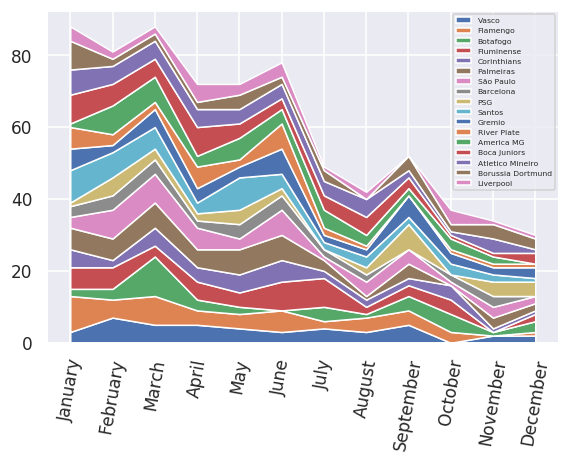

In [8]:
plt.figure(facecolor='white',dpi=110)
plt.stackplot(list(range(1,13)),counts,labels=teams)
plt.legend(loc='upper right',prop={'size': 5})
plt.xticks(list(range(1,13)), monthlabels,rotation=80)
plt.show()

Seemingly the findings are replicated, at least on the sense that players frequently have birth months on the first third of the year.

There seem to be three consistent peaks, however, in March, June and September, even across teams of different countries and continents.

With time more data could be added to see if these three peaks are still represented internationally at a larger scale